In [102]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [103]:
n = 4          # index of square grating
a = 1.2            # period 
d = 0.5*a            # side of square
t = 0.2          # thickness of grating
dpml = 2         # PML thickness
pad = 2          # padding between grating and PML

pol = mp.Ex

In [104]:
from meep.materials import Ag

nlayers = 4
# spacing = 

geom = []

for layer in range(nlayers):
    block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(0,(layer-(nlayers-1)/2)*a), material=Ag)
    geom.append(block)

In [105]:
fcen = 1
df = 0.8
nfreqs = 300

sx = a
sy = (nlayers-2)*a+2*t+2*pad+2*dpml

src = mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=pol, center=mp.Vector3(y=-sy/2+dpml+0.1), size=mp.Vector3(a))

In [106]:
cell = mp.Vector3(sx, sy)

sim = mp.Simulation(cell_size=cell,
                    default_material=mp.Medium(index=1),
                    geometry=geom,
                    sources=[src],
                    resolution=50,
                    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-sy/2+dpml+0.2), size=mp.Vector3(a,0)))
tran = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=sy/2-dpml-0.1), size=mp.Vector3(a,0)))

     block, center = (0,-2.4,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-1.2,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,1.2,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,2.4,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

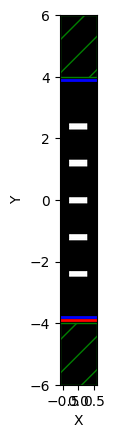

In [107]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(sx,sy)))

In [108]:
pt = mp.Vector3(y=sy-dpml-0.1) # Point to check field
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, pt, 1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 9.08375e-05 s
Working in 2D dimensions.
Computational cell is 1.2 x 12 x 0 with resolution 50
     block, center = (0,-2.4,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-1.2,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,1.2,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,2.4,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0522001 s
lorentzian susceptibi

In [109]:
p1_coeff = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
p2_coeff = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

c1 = np.array([coef[1] for coef in p1_coeff])
c2 = np.array([coef[0] for coef in p2_coeff])
c3 = np.array([coef[0] for coef in p1_coeff])

MPB solved for frequency_1(0,0.6,0) = 0.6 after 9 iters
Dominant planewave for band 1: (0.000000,0.600000,0.000000)
MPB solved for frequency_1(0,0.602676,0) = 0.602676 after 9 iters
Dominant planewave for band 1: (0.000000,0.602676,0.000000)
MPB solved for frequency_1(0,0.605351,0) = 0.605351 after 9 iters
Dominant planewave for band 1: (0.000000,0.605351,0.000000)
MPB solved for frequency_1(0,0.608027,0) = 0.608027 after 9 iters
Dominant planewave for band 1: (0.000000,0.608027,0.000000)
MPB solved for frequency_1(0,0.610702,0) = 0.610702 after 9 iters
Dominant planewave for band 1: (0.000000,0.610702,0.000000)
MPB solved for frequency_1(0,0.613378,0) = 0.613378 after 9 iters
Dominant planewave for band 1: (0.000000,0.613378,0.000000)
MPB solved for frequency_1(0,0.616054,0) = 0.616054 after 9 iters
Dominant planewave for band 1: (0.000000,0.616054,0.000000)
MPB solved for frequency_1(0,0.618729,0) = 0.618729 after 9 iters
Dominant planewave for band 1: (0.000000,0.618729,0.000000)
MP

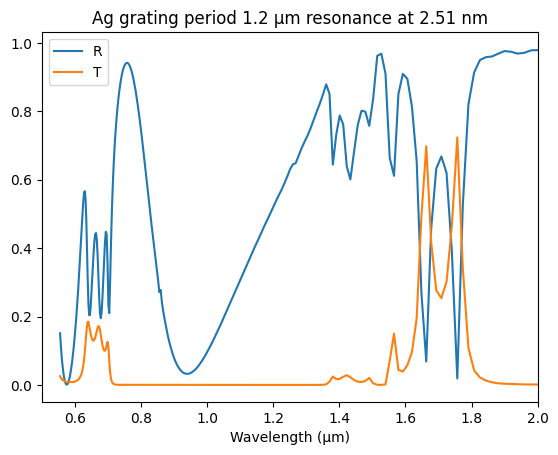

In [110]:
freqs = np.linspace(fcen-df, fcen+df, nfreqs)
wl = 1/freqs
R = np.abs(c1)**2 / np.abs(c3)**2
T = np.abs(c2)**2 / np.abs(c3)**2

res_freq = 0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

plt.plot(wl, R, label='R')
plt.plot(wl, T, label='T')
plt.title('Ag grating period %.1f µm resonance at %.2f nm' % (a, res_freq))
plt.xlabel('Wavelength (µm)')
plt.xlim(0.5, 2)
plt.legend()
title = 'square_grating_%.2fum' % res_freq
# plt.savefig('results/'+title+'.png')

In [111]:
0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

2.510843377803852

     block, center = (0,-2.4,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-1.2,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,1.2,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,2.4,0)
          size (0.6,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

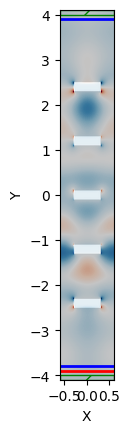

In [112]:
sim.plot2D(fields=pol, output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))